<a href="https://colab.research.google.com/github/ArchaUB/Machine-Learning/blob/main/Crude_Oil_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf


In [3]:
# Download WTI Crude Oil price data
data = yf.download("CL=F", start="2010-01-01", end="2024-12-31")

# Preview the data
data.head(15)


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,CL=F,CL=F,CL=F,CL=F,CL=F
Date,,,,,
2010-01-04,81.510002,81.680000,79.629997,79.629997,263542
2010-01-05,81.769997,82.000000,80.949997,81.629997,258887
2010-01-06,83.180000,83.519997,80.849998,81.430000,370059
2010-01-07,82.660004,83.360001,82.260002,83.199997,246632
2010-01-08,82.750000,83.470001,81.800003,82.650002,310377
2010-01-11,82.519997,83.949997,81.959999,82.879997,296304
2010-01-12,80.790001,82.339996,79.910004,82.070000,333866
2010-01-13,79.650002,80.669998,78.370003,80.059998,401627


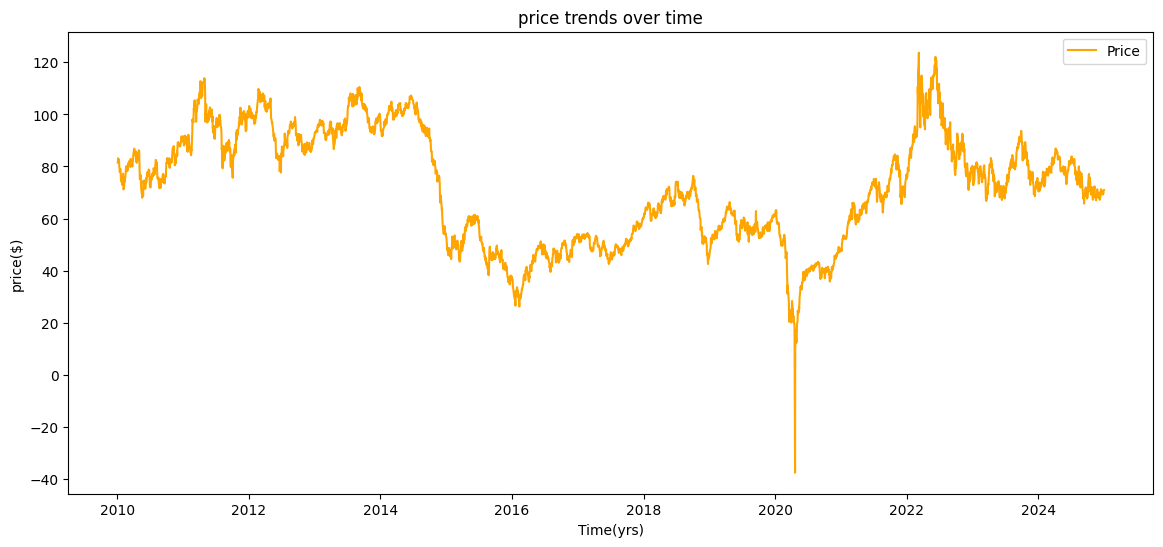

In [4]:
plt.figure(figsize=(14,6))
plt.plot(data['Close'],label='Price',color="orange")
plt.title("price trends over time")
plt.xlabel('Time(yrs)')
plt.ylabel('price($)')
plt.legend()
plt.show()

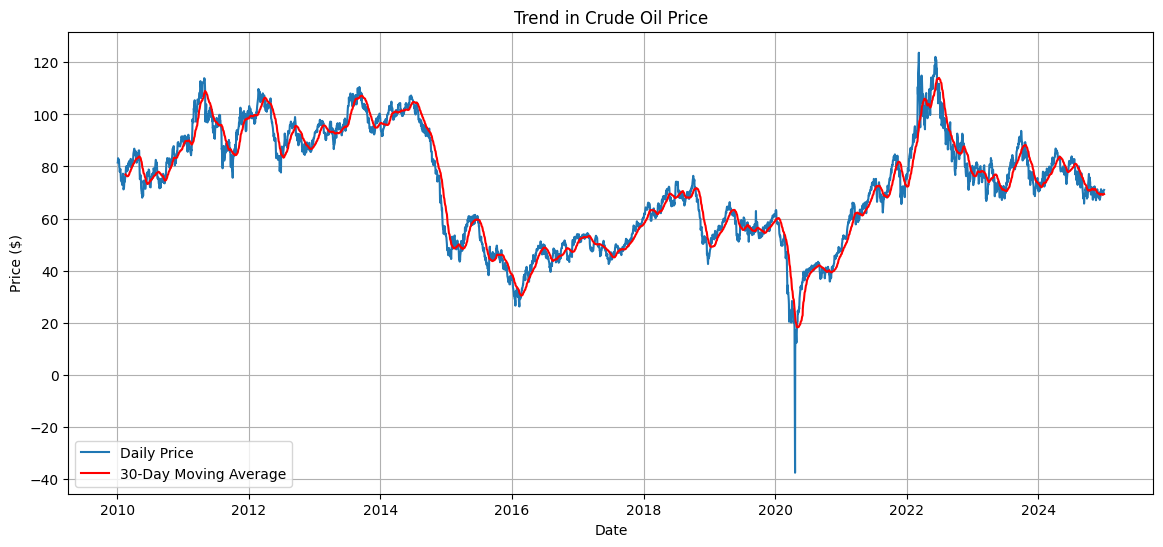

In [5]:
data['MA30'] = data['Close'].rolling(window=30).mean()

plt.figure(figsize=(14,6))
plt.plot(data['Close'], label='Daily Price')
plt.plot(data['MA30'], label='30-Day Moving Average', color='red')
plt.title('Trend in Crude Oil Price')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-11-029f098e2304>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = data['Close'].resample('M').mean()


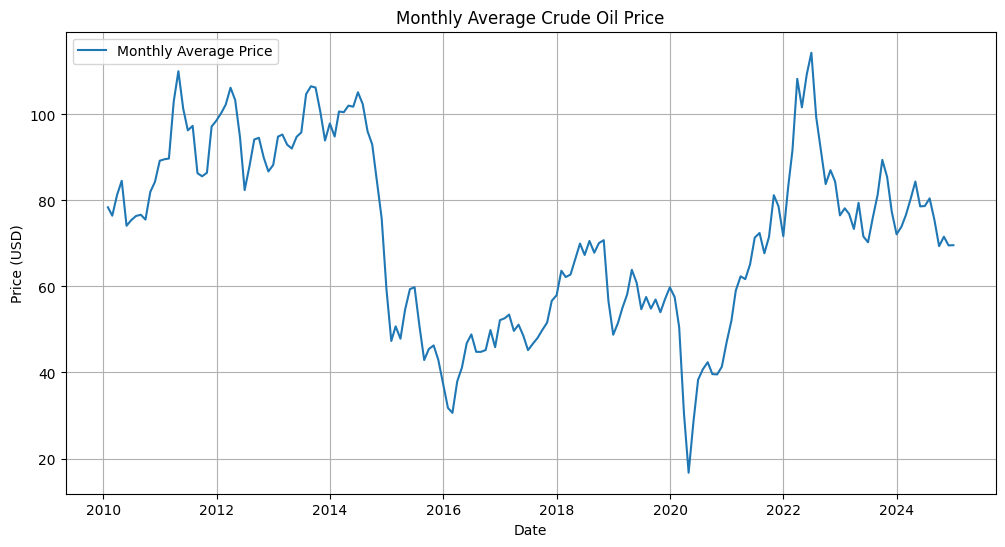

In [11]:
monthly_avg = data['Close'].resample('M').mean()

plt.figure(figsize=(12,6))
plt.plot(monthly_avg, label='Monthly Average Price')
plt.title('Monthly Average Crude Oil Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()
plt.show()


In [12]:
print(data.isnull().sum())




Price   Ticker
Close   CL=F       0
High    CL=F       0
Low     CL=F       0
Open    CL=F       0
Volume  CL=F       0
MA30              29
Month              0
dtype: int64


In [13]:
# Drop rows with missing values
data_cleaned = data.dropna()

In [18]:
print(data_cleaned.head())
print(data_cleaned.columns)


Price           Close       High        Low       Open  Volume       MA30  \
Ticker           CL=F       CL=F       CL=F       CL=F    CL=F              
Date                                                                        
2010-02-16  77.010002  77.419998  73.709999  74.019997  365032  76.973333   
2010-02-17  77.330002  77.820000  76.529999  77.320000  283816  76.834000   
2010-02-18  79.059998  79.290001  76.320000  77.290001  274169  76.743667   
2010-02-19  79.809998  80.099998  77.760002  78.370003  183234  76.631333   
2010-02-22  80.160004  80.510002  79.449997  80.099998  238956  76.548000   

Price      Month  
Ticker            
Date              
2010-02-16     2  
2010-02-17     2  
2010-02-18     2  
2010-02-19     2  
2010-02-22     2  
MultiIndex([( 'Close', 'CL=F'),
            (  'High', 'CL=F'),
            (   'Low', 'CL=F'),
            (  'Open', 'CL=F'),
            ('Volume', 'CL=F'),
            (  'MA30',     ''),
            ( 'Month',     '')],
      

In [15]:
data.head()

Price,Close,High,Low,Open,Volume,MA30,Month
Ticker,CL=F,CL=F,CL=F,CL=F,CL=F,,
Date,,,,,,,
2010-01-04,81.510002,81.680000,79.629997,79.629997,263542,NaN,1
2010-01-05,81.769997,82.000000,80.949997,81.629997,258887,NaN,1
2010-01-06,83.180000,83.519997,80.849998,81.430000,370059,NaN,1
2010-01-07,82.660004,83.360001,82.260002,83.199997,246632,NaN,1
2010-01-08,82.750000,83.470001,81.800003,82.650002,310377,NaN,1


In [16]:
# Boxplot to detect outliers in 'Close' price
plt.figure(figsize=(10, 4))
sns.boxplot(x=data_cleaned['Close'])
plt.title('Outlier Detection in Closing Prices')
plt.show()


ValueError: If using all scalar values, you must pass an index

<Figure size 1000x400 with 0 Axes>

In [17]:
# Remove outliers using IQR method
Q1 = data_cleaned['Close'].quantile(0.25)
Q3 = data_cleaned['Close'].quantile(0.75)
IQR = Q3 - Q1
filtered_data = data_cleaned[(data_cleaned['Close'] >= Q1 - 1.5*IQR) & (data_cleaned['Close'] <= Q3 + 1.5*IQR)]
